# Team Members:
# Saunvid Ganbavale,
# Aayush Bhavsar,
# Omkar Walunj

# Some Important Functions

In [1]:
from collections.abc import Sequence
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
def encode_numeric_zscore(df, name):
    mean = df[name].mean()
    sd = df[name].std()
    df[name] = (df[name] - mean) / sd

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)

    # Encode to float32 for TensorFlow
    df[result] = df[result].values.astype(np.float32)

    # Convert the target column to float32 if it's not already
    if not np.issubdtype(df[target].dtype, np.float32):
        df[target] = df[target].values.astype(np.float32)

    return df[result].values, df[target].values

# function to calculate Confusion Matrix and Plot a confusion matrix.
def calculateConfusionMatrix(y_test,y_pred,algoName):
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('Plotting confusion matrix for {}'.format(algoName))
    res=['Normal','Heart disease']
    plt.figure()
    plot_confusion_matrix(cm,res)
    plt.show()

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to Calculate and plot ROC curve
def calculateROCCurve(y_test,y_pred,algoName):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for {}'.format(algoName))
    plt.legend(loc='lower right')
    plt.show()

# Download the dataset from https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

# Importing the dataset


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score


# Load the data from the directory
data = pd.read_csv("/Users/saunvidganbavale/Desktop/CSC 219/heart_statlog_cleveland_hungary_final.csv", na_values=['NA','?'])

data



,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Dropping the duplicates rows



In [3]:
data = data.drop_duplicates().reset_index(drop=True) 

data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1


# Categorical Features: sex, chest pain type, fasting blood sugar, resting ecg,                                              exercise angina, ST slope, target

# Numerical Features: Age, resting bps, cholestrol, max heart rate, oldpeak 

In [4]:
# Separate the categorical and numerical features
categorical_features = ["sex", "chest pain type","fasting blood sugar","resting ecg","exercise angina","ST slope"]
numerical_features = ["age", "resting bp s","cholesterol","max heart rate" ,"oldpeak"]
data


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1


# Applying one hot encoding on Categorical Features

In [5]:
data = pd.get_dummies(data, columns = categorical_features)
data = data.astype(int)
data

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,40,140,289,172,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,49,160,180,156,1,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,37,130,283,98,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,48,138,214,108,1,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,54,150,195,122,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
914,68,144,193,141,3,1,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
915,57,130,131,115,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
916,57,130,236,174,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0


# Applying Normalization on Numerical Features

In [6]:
for feature in numerical_features:
    encode_numeric_zscore(data, feature)
data

,age,resting bp s,cholesterol,max heart rate,oldpeak,target,sex_0,sex_1,chest pain type_1,chest pain type_2,...,fasting blood sugar_1,resting ecg_0,resting ecg_1,resting ecg_2,exercise angina_0,exercise angina_1,ST slope_0,ST slope_1,ST slope_2,ST slope_3
0,-1.432359,0.410685,0.824621,1.382175,-0.727196,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
1,-0.478223,1.490940,-0.171867,0.753746,0.282737,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.750404,-0.129442,0.769768,-1.524307,-0.727196,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,-0.584238,0.302660,0.138964,-1.131539,0.282737,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.051853,0.950812,-0.034736,-0.581664,-0.727196,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902283,-1.209697,0.596068,-0.188897,0.282737,1,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
914,1.536064,0.626736,-0.053020,0.164595,2.302603,1,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0
915,0.369898,-0.129442,-0.619830,-0.856602,0.282737,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
916,0.369898,-0.129442,0.340090,1.460728,-0.727196,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0


# Splitting the data into train and test


In [7]:
x,y = to_xy(data,"target")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Knn


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=13)

# Train the model
knn.fit(x_train, y_train)

# Make predictions on the test set

y_pred_knn = knn.predict(x_test)

print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85        77
         1.0       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Calculate confusion matrix for KNN

[[67 10]
 [13 94]]
Plotting confusion matrix for KNN


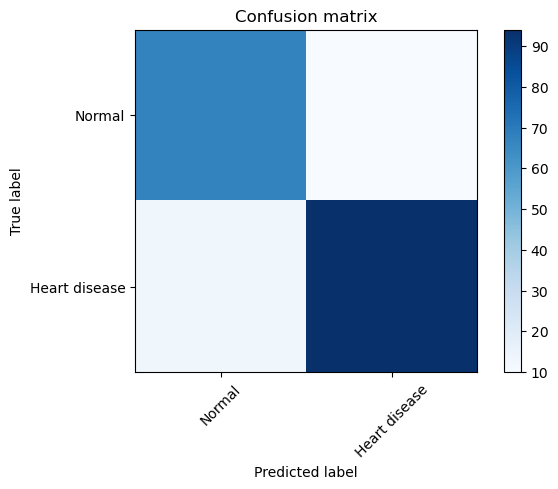

In [9]:
KnnConfusionMatrix = calculateConfusionMatrix(y_test,y_pred_knn,'KNN')


# Calculate ROC for KNN

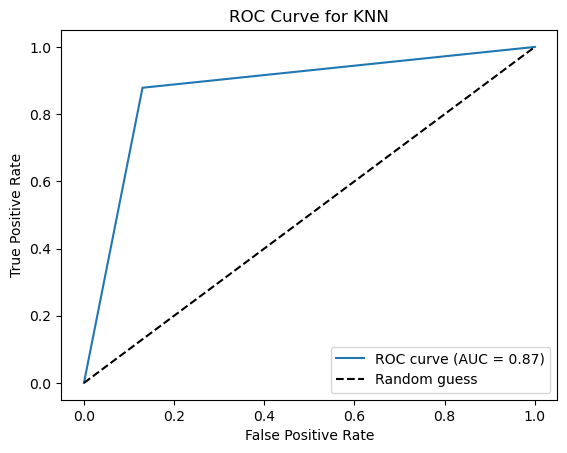

In [10]:
KnnROCCurve = calculateROCCurve(y_test,y_pred_knn,'KNN')


# FCNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard


In [12]:
# Define the model architecture
model_fcnn = Sequential() # linear stack of layers
model_fcnn.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))

model_fcnn.add(Dense(8, activation='relu'))
model_fcnn.add(Dense(1, activation='tanh'))

# Compile the model
model_fcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint("model_fcnn.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
#Saves the best model weights based on validation accuracy 

earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
#Stops further training of model when validation loss stops improving It is also used to reduce overfitting of our model

tensorboard_callback = TensorBoard(log_dir="/Users/saunvidganbavale/Desktop/logs", histogram_freq=1, write_graph=True)
#To plot the graph on training and test on the basis of validation loss and accuracy

# Train the model
history = model_fcnn.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint, earlystop,tensorboard_callback])

# Evaluate the model on the test set
loss, accuracy = model_fcnn.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")

Epoch 1/100
 1/23 [>.............................] - ETA: 3s - loss: 2.0873 - accuracy: 0.5000

2023-10-02 15:12:28.106540: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to model_fcnn.h5
23/23 [==============================] - 0s 5ms/step - loss: 1.5609 - accuracy: 0.5027 - val_loss: 1.2737 - val_accuracy: 0.5000
Epoch 2/100
 1/23 [>.............................] - ETA: 0s - loss: 1.1547 - accuracy: 0.5938
Epoch 2: val_accuracy improved from 0.50000 to 0.65217, saving model to model_fcnn.h5
23/23 [==============================] - 0s 2ms/step - loss: 0.8167 - accuracy: 0.6267 - val_loss: 0.8018 - val_accuracy: 0.6522
Epoch 3/100
 1/23 [>.............................] - ETA: 0s - loss: 0.6304 - accuracy: 0.6875
Epoch 3: val_accuracy improved from 0.65217 to 0.70109, saving model to model_fcnn.h5
23/23 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.6948 - val_loss: 0.6844 - val_accuracy: 0.7011
Epoch 4/100
 1/23 [>.............................] - ETA: 0s - loss: 0.4956 - accuracy: 0.8125
Epoch 4: val_accuracy improved from 0.70109 to 0.71196, saving model to 

# Running TensorBoard


In [13]:
%load_ext tensorboard
%tensorboard --logdir "/Users/saunvidganbavale/Desktop/logs"

Reusing TensorBoard on port 6006 (pid 93433), started 18:58:11 ago. (Use '!kill 93433' to kill it.)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Make predictions on the test set
y_pred_fcnn = model_fcnn.predict(x_test)
# print(y_pred_fcnn)

y_pred_binary = np.where(y_pred_fcnn > 0.5, 1, 0)  # Threshold the predicted values to obtain binary labels


precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
classification_report = classification_report(y_test, y_pred_binary)

print("Classification Report:\n", classification_report)


6/6 [==============================] - 0s 471us/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.83        77
         1.0       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# Calculate confusion matrix for FCNN

[[65 12]
 [15 92]]
Plotting confusion matrix for FCNN


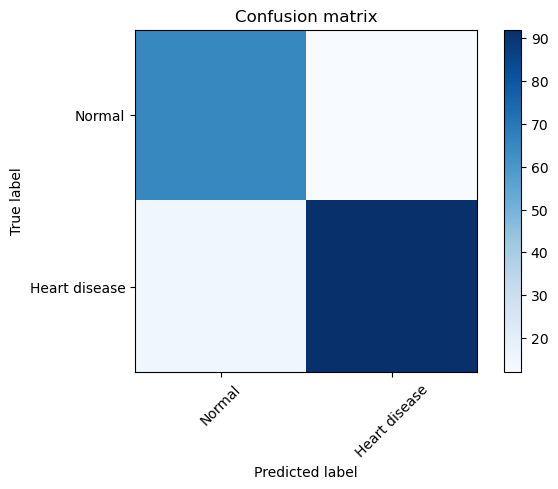

In [15]:
# Calculating and ploting confion matrix for FCNN
FcnnConfusionMatrix=calculateConfusionMatrix(y_test,y_pred_binary,'FCNN')

# Calculate ROC for FCNN

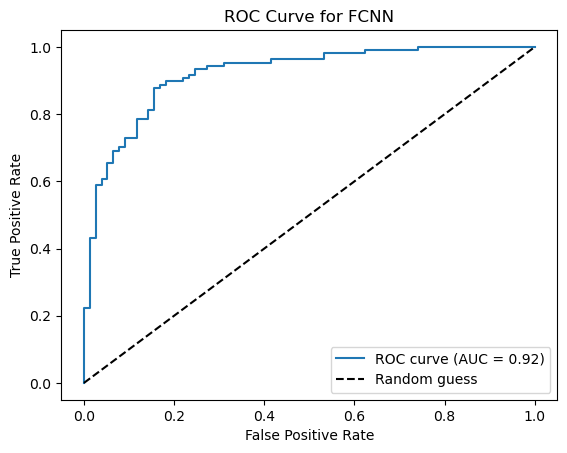

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
#Calculating ROC curve for FCNN
FcnnROCCurve = calculateROCCurve(y_test,y_pred_fcnn,'FCNN')


# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the SVM model
svm = SVC(kernel='linear', C=3.0)  

# Train the SVM model
svm.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(x_test)

# Evaluate the performance of the SVM model
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

svm_acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy for SVM:", svm_acc)


Classification Report for SVM:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        77
         1.0       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy for SVM: 0.8586956521739131


# Calculate confusion matrix for SVM

[[67 10]
 [16 91]]
Plotting confusion matrix for SVM


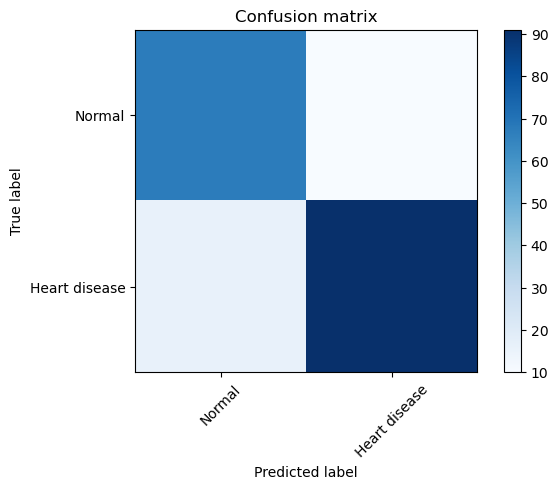

In [18]:
SVMConfusionMatrix = calculateConfusionMatrix(y_test,y_pred_svm,'SVM')


# Calculate ROC for SVM

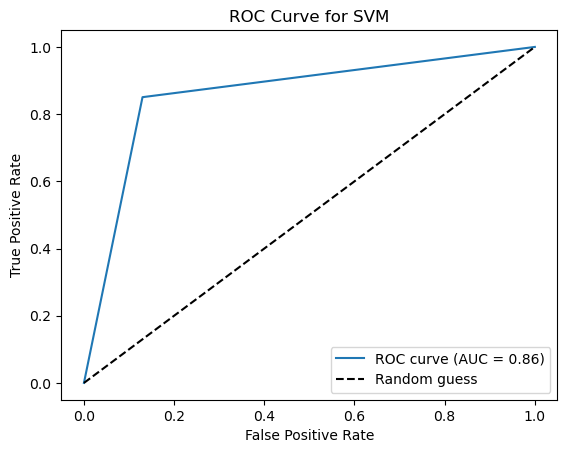

In [19]:
SVMROCCurve = calculateROCCurve(y_test,y_pred_svm,'SVM')

# Extra Feature: Feature Selection

In [20]:
import sklearn.feature_selection as fs
var = fs.VarianceThreshold(threshold=0.2) # features with variance below threshold will be removed
var.fit(x)
X_trans = var.transform(x)
print(X_trans)

[[-1.432359    0.41068503  0.8246208  ...  0.          1.
   0.        ]
 [-0.4782229   1.4909396  -0.17186736 ...  0.          0.
   1.        ]
 [-1.7504044  -0.12944227  0.7697682  ...  0.          1.
   0.        ]
 ...
 [ 0.36989808 -0.12944227 -0.6198299  ...  1.          0.
   1.        ]
 [ 0.36989808 -0.12944227  0.34008983 ...  0.          0.
   1.        ]
 [-1.6443893   0.30265957 -0.21757783 ...  0.          1.
   0.        ]]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

In [22]:
knn_new = KNeighborsClassifier(n_neighbors=13)

# Train the model
knn_new.fit(x_train, y_train)

# Make predictions on the test set
y_pred_knn_new = knn_new.predict(x_test)

print(classification_report(y_test, y_pred_knn_new))


              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81        77
         1.0       0.89      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184

